### Zadania
 
1. Uruchomiƒá 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mno≈ºenie BLAS w Julii (`A*B`) 

    dla coraz wiƒôkszych macierzy kwadratowych i zmierzyƒá czasy. Narysowaƒá wykres zale≈ºyno≈õci czasu od rozmiaru macierzy wraz z s≈Çupkami b≈Çƒôd√≥w. Wszystkie trzy metody powinny byƒá na jednym wykresie. **(1pkt)**. Do analizy danych mo≈ºna u≈ºyƒá wybranego narzƒôdzia (Julia, R)

In [1]:
using LinearAlgebra
using DataFrames
using CSV
using Statistics
using Plots
using Polynomials
using Pkg
using TaylorSeries


(process:25444): GLib-GIO-WARNING **: 12:21:14.310: Unexpectedly, UWP app `Microsoft.ZuneVideo_10.22021.10291.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ZuneVideo_8wekyb3d8bbwe!Microsoft.ZuneVideo') supports 33 extensions but has no verbs


In [2]:
# przyk≈Çad do ma≈Çych kompilacji
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall

2√ó2 Matrix{Float64}:
 1.0  4.0
 0.0  1.0

In [3]:
# mno≈ºenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [4]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2√ó2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [5]:
# poprawiona funkcja korzytajƒÖca z powy≈ºszego oraz z faktu, ≈ºe
# mo≈ºna zmieniaƒá kolejno≈õƒá operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [6]:
better_multiplication(Asmall, Bsmall)

2√ó2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [7]:
#kompilacja funkcji BLASowej do mno≈ºenia macierzy
Asmall*Bsmall

2√ó2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [8]:
sizes = Int64[]
times = Float64[]
method = String[]

for i=10:25:1000
    A = rand(i, i);
    B = rand(i, i);
    for k=1:10
        for j=1:3
            if j == 1
                time = @elapsed naive_multiplication(A, B)
                push!(method, "naive")
            elseif j == 2
                time = @elapsed better_multiplication(A, B)
                push!(method, "better")
            else
                time = @elapsed A*B
                push!(method, "blas")
            end
            push!(times, time)
            push!(sizes, i)
        end
    end
end

In [9]:
df = DataFrame(size = sizes,
    method = method, 
    time = times)

grouped = groupby(df, [:size, :method])
stats = combine(grouped, "time" => mean, "time" => std)

120√ó4 DataFrame
 Row ‚îÇ size   method  time_mean   time_std    
     ‚îÇ Int64  String  Float64     Float64     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    10  naive   1.31e-6     1.85293e-7
   2 ‚îÇ    10  better  1.3e-6      3.74166e-7
   3 ‚îÇ    10  blas    0.00014511  0.000457402
   4 ‚îÇ    35  naive   7.278e-5    1.15465e-5
   5 ‚îÇ    35  better  5.072e-5    7.768e-6
   6 ‚îÇ    35  blas    5.47e-6     2.58932e-6
   7 ‚îÇ    60  naive   0.00038931  1.87033e-5
   8 ‚îÇ    60  better  0.00020866  7.25966e-6
   9 ‚îÇ    60  blas    1.921e-5    2.62486e-6
  10 ‚îÇ    85  naive   0.00118338  3.19738e-5
  11 ‚îÇ    85  better  0.00061383  3.69626e-6
  ‚ãÆ  ‚îÇ   ‚ãÆ      ‚ãÆ         ‚ãÆ            ‚ãÆ
 111 ‚îÇ   910  blas    0.00958743  0.00152956
 112 ‚îÇ   935  naive   1.80338     0.0308717
 113 ‚îÇ   935  better  0.912337    0.0299379
 114 ‚îÇ   935  blas    0.0103037   0.000502081
 115 ‚îÇ   960  naive   2.10459     0.108868
 116 ‚îÇ   960  better  1.03823     0.0449582
 117 ‚îÇ   960  blas    0.0111244   0.00178346
 118 ‚îÇ   985  naive   2.25393     0.11877
 119 ‚îÇ   985  better  1.12062     0.0737879
 120 ‚îÇ   985  blas    0.0123184   0.000341334
                               99 rows omitted

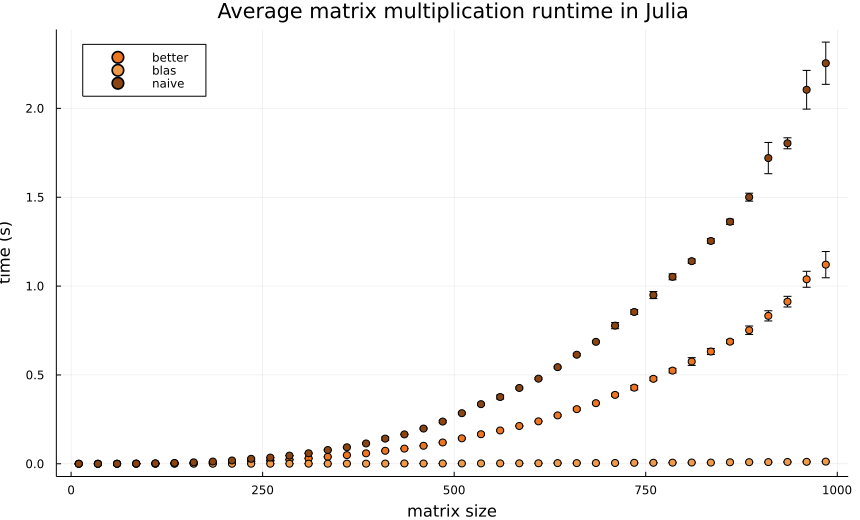

In [10]:
scatter(stats.size, stats.time_mean, group=stats.method, 
    title = "Average matrix multiplication runtime in Julia",
    label = ["better" "blas" "naive"], 
    colour = [:chocolate2 :tan2 :saddlebrown],  
    yerr=stats.time_std, 
    xlabel="matrix size", ylabel="time (s)", size=(860, 520), legend=:topleft)

2. Napisaƒá w jƒôzyku C:
   - naiwnƒÖ metodƒô mno≈ºenia macierzy kwadratowych (wersja 1) 
   - ulepszonƒÖ wersjƒô za pomocƒÖ zamiany pƒôtli metodƒô mno≈ºenia macierzy(wersja 2), pamiƒôtajƒÖc, ≈ºe w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej ni≈º w Julii ! 
   - skorzystaƒá z  mo≈ºliwo≈õci BLAS poziom 3 dostƒôpnego w GSL  (przyk≈Çad uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Nale≈ºy por√≥wnywaƒá dzia≈Çanie tych trzech algorytmow bez w≈ÇƒÖczonej opcji optymalizacji kompilatora. Przedstawiƒá wyniki na jednym wykresie tak jak w p.1. (osobno ni≈º p.1). **(1 pkt)**
    
    *(Dla chƒôtnych)* sprawdziƒá, co siƒô dzieje, jak w≈ÇƒÖczymy optymalizacjƒô kompilatora i dodaƒá do wykresu. 
Do analizy danych mo≈ºna u≈ºyƒá wybranego narzƒôdzia (Julia, R)

```c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <gsl/gsl_blas.h>

int ** declare_matrix(int size){
	int ** A = (int **) calloc (sizeof(int *), size);
    for(int i = 0; i < size; i++){
        A[i] = (int *)calloc(sizeof(int), size);
    }
    for(int i = 0; i < size; i++){
        for (int j = 0; j < size; j++){
            A[i][j] = rand()%10;
        }
    }
	return A;
}

double naive(int *A[], int *B[], int size){
    clock_t start, end;
	double time;
	int ** C = (int **) calloc(sizeof(int *), size);
	for(int i = 0; i < size; i++){
		C[i] = (int *)calloc(sizeof(int), size);
	}
    start = clock();
	for(int i = 0; i < size; i++){
		for(int j = 0; j < size; j++){
			for(int k = 0; k < size; k++){
				C[i][j] = C[i][j] + A[i][k]*B[k][j];
			}
		}
	}
    end = clock();
	for(int i = 0; i < size; i++){
		free(C[i]);
	}
    time = ((double) (end - start)) / CLOCKS_PER_SEC;
	return time;
}

double better(int *A[], int *B[], int size){
    clock_t start, end;
	double time;
	int ** C = (int **) calloc(sizeof(int *), size);
	for(int i = 0; i < size; i++){
		C[i] = (int *)calloc(sizeof(int), size);
	}
    start = clock();
	for(int i = 0; i < size; i++){
		for(int k = 0; k < size; k++){
			for(int j = 0; j < size; j++){
				C[i][j] = C[i][j] + A[i][k]*B[k][j];
			}
		}
	}
    end = clock();
	for(int i = 0; i < size; i++){
		free(C[i]);
	}
    time = ((double) (end - start)) / CLOCKS_PER_SEC;
	return time;
}

double gsl_blas(int *A[], int *B[], int size){
    clock_t start, end;
	double time;
    double * a = (double *)calloc(sizeof(double ), size*size);
    double * b = (double *)calloc(sizeof(double ), size*size);
    double * c = (double *)calloc(sizeof(double ), size*size);
    int k = 0;
    for(int i = 0; i < size; i++){
        for (int j = 0; j < size; ++j) {
            a[k] = (double ) A[i][j];
            b[k] = (double ) B[i][j];
            k++;
        }
    }
    gsl_matrix_view A2 = gsl_matrix_view_array(a, size, size);
    gsl_matrix_view B2 = gsl_matrix_view_array(b, size, size);
    gsl_matrix_view C = gsl_matrix_view_array(c, size, size);
    start = clock();
    gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0, &A2.matrix, &B2.matrix, 0.0, &C.matrix);
    end = clock();
    free(a);
    free(b);
    free(c);
    time = ((double) (end - start)) / CLOCKS_PER_SEC;
	return time;
}

int main(){
    int n = 10;
	int sizes[n];
    int size[n*10*3];
	char * method[n*10*3];
    float times[n*10*3];

	sizes[0] = 10;
    int j = 10;
	for(int i = 1; i < n; i++){
		sizes[i] = j;
        j += 25;
	}

    printf("size,time,method\n");
    int s = 0;
	for(int i = 0; i < n; i++){
		int ** A = declare_matrix(sizes[i]);
		int ** B = declare_matrix(sizes[i]);
		for(int j = 0; j < 10; j++){
			for(int k = 0; k < 3; k++){
                double time;
                if(k == 0){
                    time = naive(A, B, sizes[i]);
                    method[s] = "naive";
                }else if(k == 1){
                    time = better(A, B, sizes[i]);
                    method[s] = "better";
                }else{
                    time = gsl_blas(A, B, sizes[i]);
                    method[s] = "gsl blas";
                }
                times[s] = time;
                size[s] = sizes[i];
                s++;
			}
		}

		for(int k = 0; k < sizes[i]; k++){
			free(A[k]);
			free(B[k]);
		}

    }

    for(int i = 0; i < n*10*3; i++){
        printf("%d,%f,%s\n", size[i], times[i], method[i]);
    }

    return 0;
}

```



In [11]:
# odczytanie z pliku CSV, pogrupowanie i wyliczenie ≈õredniego czasu i odchyle≈Ñ
df_ = CSV.read("try.csv", delim=",",DataFrame)
grouped_ = groupby(df_, [:size, :method])
stats_ = combine(grouped_, "time" => mean, "time" => std)

117√ó4 DataFrame
 Row ‚îÇ size   method    time_mean  time_std    
     ‚îÇ Int64  String15  Float64    Float64     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    10  naive     4.1e-6     3.07794e-7
   2 ‚îÇ    10  better    4.05e-6    2.23607e-7
   3 ‚îÇ    10  gsl blas  2.8e-6     8.28823e-6
   4 ‚îÇ    35  naive     0.0001516  3.13404e-6
   5 ‚îÇ    35  better    0.0001561  1.03113e-5
   6 ‚îÇ    35  gsl blas  2.66e-5    8.43274e-7
   7 ‚îÇ    60  naive     0.000674   2.79245e-5
   8 ‚îÇ    60  better    0.0006944  2.82772e-5
   9 ‚îÇ    60  gsl blas  9.45e-5    4.52769e-6
  10 ‚îÇ    85  naive     0.0018262  6.30658e-5
  11 ‚îÇ    85  better    0.001871   0.000149176
  ‚ãÆ  ‚îÇ   ‚ãÆ       ‚ãÆ          ‚ãÆ           ‚ãÆ
 108 ‚îÇ   885  gsl blas  0.355331   0.015431
 109 ‚îÇ   910  naive     3.32003    0.207581
 110 ‚îÇ   910  better    2.5141     0.0429298
 111 ‚îÇ   910  gsl blas  0.401705   0.04573
 112 ‚îÇ   935  naive     3.72363    0.294659
 113 ‚îÇ   935  better    2.74939    0.0533125
 114 ‚îÇ   935  gsl blas  0.425946   0.0188124
 115 ‚îÇ   960  naive     4.33538    0.0647418
 116 ‚îÇ   960  better    2.96486    0.0296671
 117 ‚îÇ   960  gsl blas  0.46624    0.0156209
                                96 rows omitted

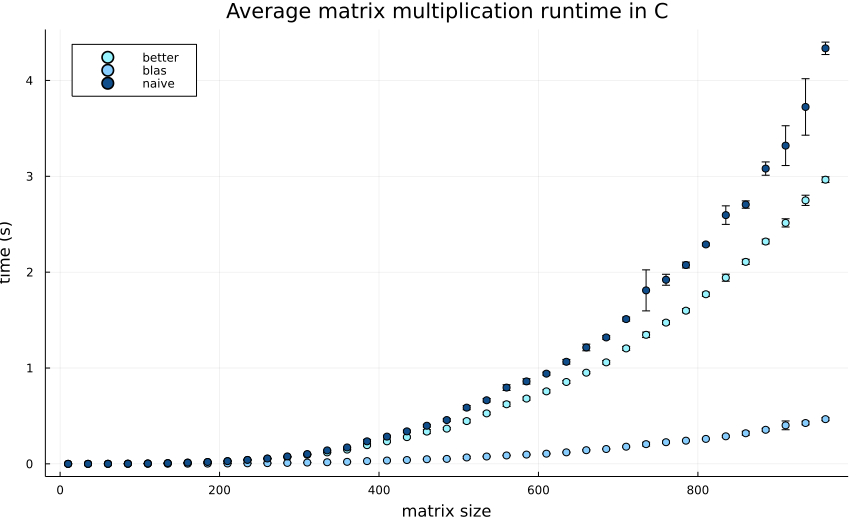

In [336]:
scatter(stats_.size, stats_.time_mean, group=stats_.method, 
    title = "Average matrix multiplication runtime in C",
    label = ["better" "blas" "naive"], 
    colour = [:cadetblue1 :skyblue1 :dodgerblue4],  
    yerr=stats_.time_std, 
    xlabel="matrix size", ylabel="time (s)", size=(860, 520), legend=:topleft)

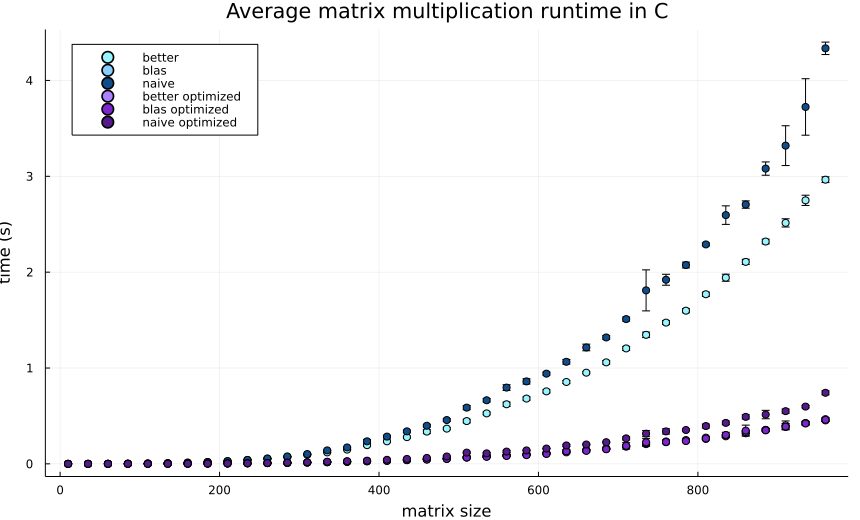

In [337]:
# dla opcji z optymalizacjƒÖ O1
df_o = CSV.read("try_o1.csv", delim=",",DataFrame)
grouped_o = groupby(df_o, [:size, :method])
stats_o = combine(grouped_o, "time" => mean, "time" => std)
scatter!(stats_o.size, stats_o.time_mean, group=stats_o.method, 
    label = ["better optimized" "blas optimized" "naive optimized"], 
    colour = [:mediumpurple1 :purple3 :purple4],  
    yerr=stats_o.time_std)

3.  U≈ºyƒá aproksymacji odpowiednimi wielomianami, kt√≥re najlepiej pasujƒÖ do zale≈ºno≈õci czasowych ka≈ºdego z algorytm√≥w. Stopie≈Ñ wielomianu powinien zgadzaƒá siƒô z teoretycznƒÖ z≈Ço≈ºonosciƒÖ. Dodaƒá wykresy uzyskanych wielomian√≥w do wcze≈õniejszych wykres√≥w. **(1 pkt)** Do analizy danych mo≈ºna u≈ºyƒá wybranego narzƒôdzia (Julia, R)

In [14]:
jnaive = stats[stats.method .=="naive" , :]
jbetter = stats[stats.method .=="better" , :]
jblas = stats[stats.method .=="blas" , :]
cnaive = stats_[stats_.method .=="naive" , :]
cbetter = stats_[stats_.method .=="better" , :]
cblas = stats_[stats_.method .=="gsl blas" , :]

39√ó4 DataFrame
 Row ‚îÇ size   method    time_mean  time_std    
     ‚îÇ Int64  String15  Float64    Float64     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    10  gsl blas  2.8e-6     8.28823e-6
   2 ‚îÇ    35  gsl blas  2.66e-5    8.43274e-7
   3 ‚îÇ    60  gsl blas  9.45e-5    4.52769e-6
   4 ‚îÇ    85  gsl blas  0.0002783  8.83239e-6
   5 ‚îÇ   110  gsl blas  0.0005541  1.94962e-5
   6 ‚îÇ   135  gsl blas  0.0010253  3.89303e-5
   7 ‚îÇ   160  gsl blas  0.0017285  4.59208e-5
   8 ‚îÇ   185  gsl blas  0.002686   9.79478e-5
   9 ‚îÇ   210  gsl blas  0.004086   0.00010387
  10 ‚îÇ   235  gsl blas  0.0056877  0.000114933
  11 ‚îÇ   260  gsl blas  0.0074844  0.000174166
  ‚ãÆ  ‚îÇ   ‚ãÆ       ‚ãÆ          ‚ãÆ           ‚ãÆ
  30 ‚îÇ   735  gsl blas  0.205513   0.0195752
  31 ‚îÇ   760  gsl blas  0.225748   0.0128764
  32 ‚îÇ   785  gsl blas  0.24172    0.00660108
  33 ‚îÇ   810  gsl blas  0.260276   0.00711957
  34 ‚îÇ   835  gsl blas  0.287282   0.0107297
  35 ‚îÇ   860  gsl blas  0.319125   0.0205399
  36 ‚îÇ   885  gsl blas  0.355331   0.015431
  37 ‚îÇ   910  gsl blas  0.401705   0.04573
  38 ‚îÇ   935  gsl blas  0.425946   0.0188124
  39 ‚îÇ   960  gsl blas  0.46624    0.0156209
                                18 rows omitted

In [338]:
fit_jnaive = fit(jnaive.size, jnaive.time_mean, 3) 

Polynomial(-0.023081238890422528 + 0.00037556554018937583*x - 1.2682488297852461e-6*x^2 + 3.232403353568064e-9*x^3)

In [339]:
fit_jbetter = fit(jbetter.size, jbetter.time_mean, 3) 

Polynomial(-0.010656249379716435 + 0.000172758973403549*x - 5.755600372798388e-7*x^2 + 1.5639201332616868e-9*x^3)

In [350]:
fit_jblas = fit(jblas.size, jblas.time_mean, 2) 

Polynomial(0.0006851569703042817 - 6.351339936238356e-6*x + 1.768378535456842e-8*x^2)

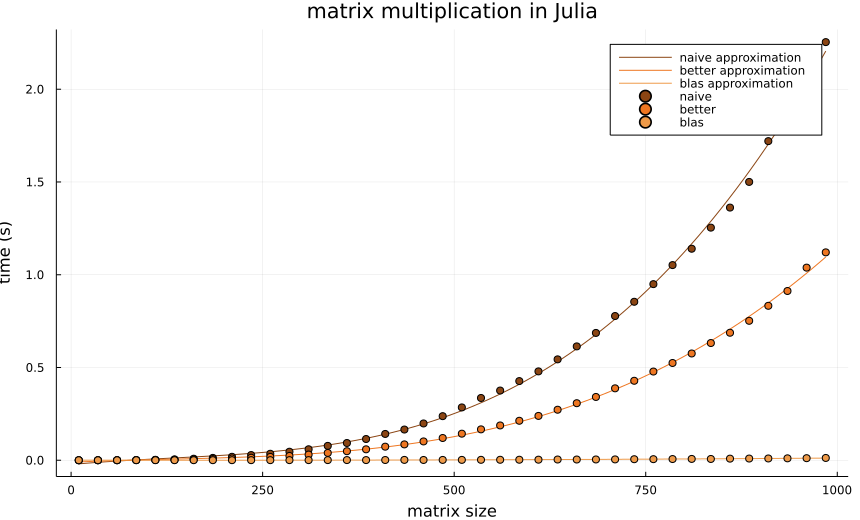

In [351]:
plot(fit_jnaive,  extrema(jnaive.size)..., label ="naive approximation", color=:saddlebrown, size=(860, 520), 
    title="matrix multiplication in Julia",
xlabel="matrix size", ylabel="time (s)")
plot!(fit_jbetter,  extrema(jbetter.size)..., label ="better approximation", color=:chocolate2)
plot!(fit_jblas,  extrema(jblas.size)..., label ="blas approximation", color=:tan2)

scatter!(jnaive.size, jnaive.time_mean, label ="naive", color=:saddlebrown)
scatter!(jbetter.size, jbetter.time_mean, label ="better", color=:chocolate2)
scatter!(jblas.size, jblas.time_mean, label ="blas", color=:tan2)

In [344]:
fit_cnaive = fit(cnaive.size, cnaive.time_mean, 3) 

Polynomial(-0.04296968415062044 + 0.0006688374206132777*x - 2.3776657121558687e-6*x^2 + 6.415321209547625e-9*x^3)

In [345]:
fit_cbetter = fit(cbetter.size, cbetter.time_mean, 3) 

Polynomial(-0.0020571620438613295 + 5.057382412143559e-6*x + 9.308404576025672e-9*x^2 + 3.3292523294895424e-9*x^3)

In [348]:
fit_cblas = fit(cblas.size, cblas.time_mean, 2) 

Polynomial(0.02705954524623226 - 0.00032534883495232146*x + 7.833477308452915e-7*x^2)

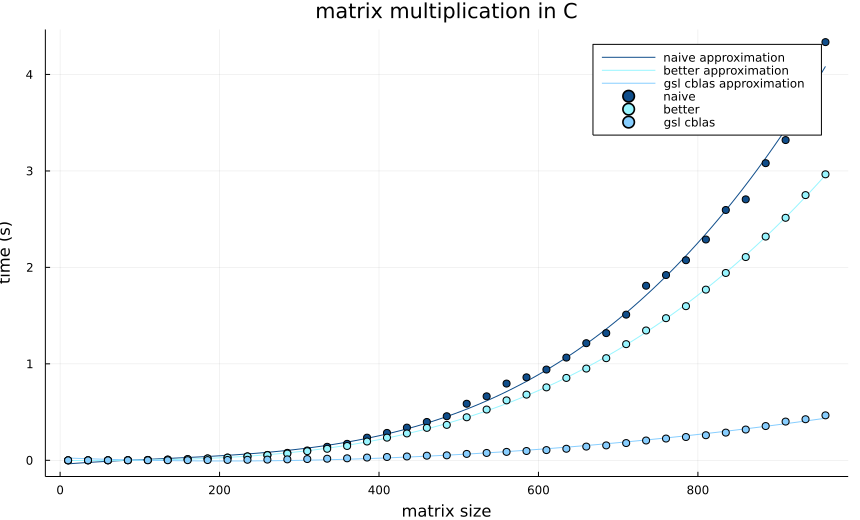

In [349]:
plot(fit_cnaive,  extrema(cnaive.size)..., label ="naive approximation", color=:dodgerblue4, size=(860, 520), 
    title="matrix multiplication in C",
xlabel="matrix size", ylabel="time (s)")
plot!(fit_cbetter,  extrema(cbetter.size)..., label ="better approximation", color=:cadetblue1)
plot!(fit_cblas,  extrema(cblas.size)..., label ="gsl cblas approximation", color=:skyblue1)

scatter!(cnaive.size, cnaive.time_mean, label ="naive", color=:dodgerblue4)
scatter!(cbetter.size, cbetter.time_mean, label ="better", color=:cadetblue1)
scatter!(cblas.size, cblas.time_mean, label ="gsl cblas", color=:skyblue1)

4. Pokazaƒá zniwelowanie efektu Rungego  poprzez u≈ºycie wsparcia dla wielomian√≥w Czebyszewa w pakiecie Polynomials. Wymagany wykres. **(1 pkt)**

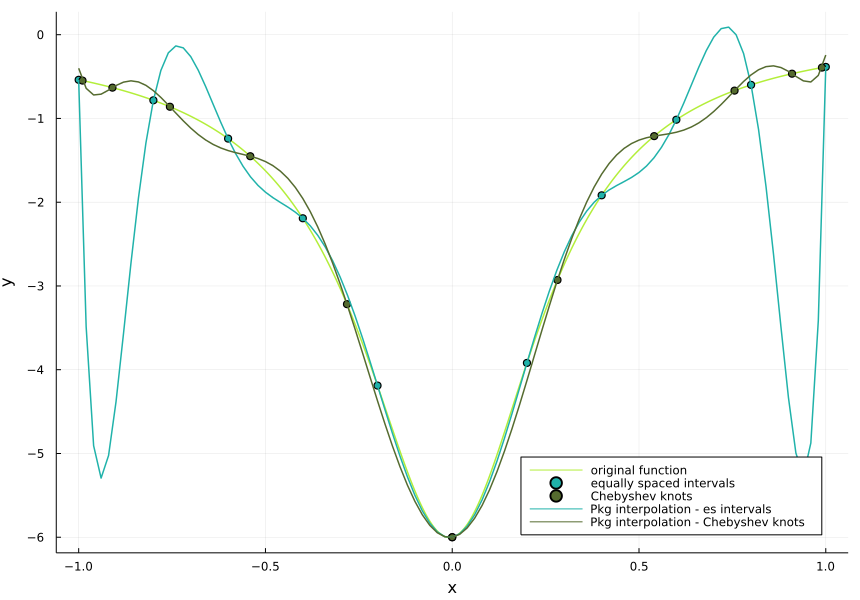

In [332]:
# przyk≈Çadowa funkcja
function fun(x)
    return ((x-6)/(12*x^2+1))
end

# wyliczenie warto≈õci do dok≈Çadnego wykresu funkcji
xss = -1:0.001:1
yss = [fun(x) for x in xss]

# wƒôz≈Çy r√≥wnoodleg≈Çe i warto≈õci dla nich (11 wƒôz≈Ç√≥w)
xs = -1:0.2:1
ys = [fun(x) for x in xs]

# wƒôz≈Çy Czebyszewa i warto≈õci dla nich (11 wƒôz≈Ç√≥w -> push poniewa≈º wƒôz≈Çy Czebyszewa od T_0)
coeffs = [0 for x in xs]
push!(coeffs, 1)

# wyliczenie wielomanu Czebyszewa
ch = ChebyshevT(coeffs)
ch_xs = roots(ch)
ch_ys = [fun(x) for x in ch_xs]

plot(xss, yss, size=(860, 600), label="original function", legend=:bottomright, color=:olivedrab2, width=1.5,
xlabel="x", ylabel="y")
scatter!(xs, ys, label="equally spaced intervals", color=:lightseagreen)
scatter!(ch_xs, ch_ys, label="Chebyshev knots", color=:darkolivegreen)

f1 = fit(xs, ys)
f2 = fit(ch_xs, ch_ys)
plot!(f1, extrema(xs)..., label="Pkg interpolation - es intervals", color=:lightseagreen, width=1.5)
plot!(f2, extrema(xs)..., label="Pkg interpolation - Chebyshev knots", color=:darkolivegreen, width=1.5)

In [26]:
function chebyshev(n, ys)
    Ts = [0 for i in range(1:n)]
    coeffs = []
    for i=1:n
        Ts[i] = 1
        y = ChebyshevT(Ts)
        c = 0
        for k=1:n
            c += ys[k]*y
        end
        c *= 2/(n+1)
        push!(coeffs, c)
        Ts[i] = 0
    end
end

chebyshev (generic function with 1 method)

5. Przybli≈ºenie Pade jest czƒôsto lepsze ni≈º rozwiniƒôcie w szereg Taylora przy aproksymowaniu funkcji, kt√≥re posiadajƒÖ osobliwo≈õci. KorzystajƒÖc ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazaƒá dowolny przyk≈Çad (wraz z wykresem), gdzie takie przybli≈ºenie faktycznie jest lepsze. Mo≈ºna odtworzyƒá wykres z wyk≈Çadu albo zainspirowaƒá siƒô przyk≈Çadowym artyku≈Çem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**

In [386]:
# funkcja do przybli≈ºenia
function func(x)
    return sqrt((8+7*x)/(6+x))
end

func (generic function with 1 method)

In [387]:
# definiujemy, ile pierwszych wyraz√≥w szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)
# rozwiniƒôcie Taylora
taylor = func(t)

 1.1547005383792515 + 0.40895644067598497 t - 0.14057877648236983 t¬≤ + 0.061148217800727794 t¬≥ - 0.032107344253873016 t‚Å¥ + 0.01913138093601449 t‚Åµ + ùí™(t‚Å∂)

In [388]:
# tworzymy wielomian dla pakietu Polynomials
fieldnames(typeof(taylor))
taylor.coeffs
pol_taylor = Polynomial(taylor.coeffs)

Polynomial(1.1547005383792515 + 0.40895644067598497*x - 0.14057877648236983*x^2 + 0.061148217800727794*x^3 - 0.032107344253873016*x^4 + 0.01913138093601449*x^5)

In [389]:
# aproksymujemy technikƒÖ Pade n = m+1, n = 3, m = 2
pade = Polynomials.PolyCompat.PadeApproximation.Pade(pol_taylor, 3, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.1547005383792515 + 1.4915765725601562*x + 0.45003497021586225*x^2 + 0.002723153650433447*x^3), Polynomial(1.0 + 0.9375765368601515*x + 0.1794281516603395*x^2), :x)

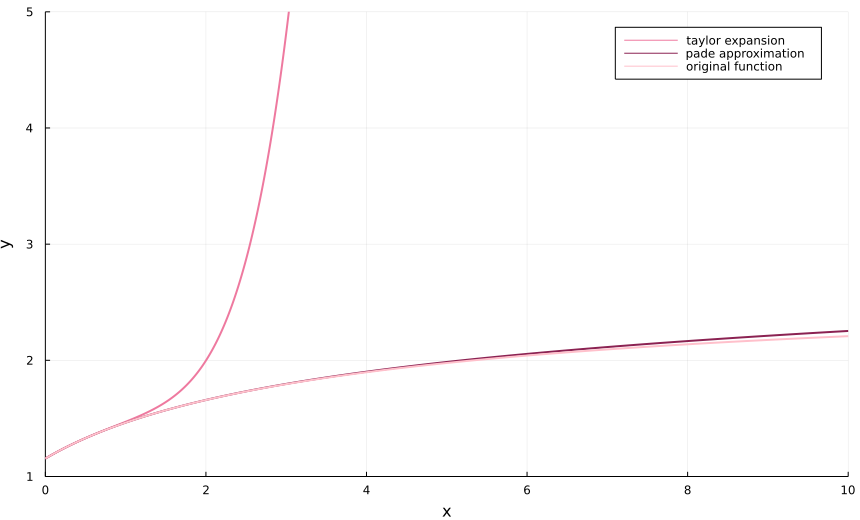

In [392]:
# wyb√≥r punkt√≥w do wykresu
xs = 0:0.01:10
ys = [func(x) for x in xs]
ts = [pol_taylor(x) for x in xs]
ps = [pade(x) for x in xs]

# wykres
plot(xs, ts, label="taylor expansion", color=:palevioletred2, linewidth=2, size=(860, 520), xlabel="x", ylabel="y", 
    ylims=(1,5), xlims=(0,10))
plot!(xs, ps, label="pade approximation", color=:violetred4, linewidth=2)
plot!(xs, ys, label="original function", color=:pink, linewidth=2)